In [1]:
import numpy as np
import sep
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

Reading image and plot


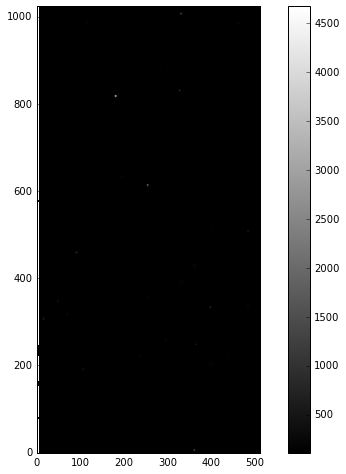

In [2]:
print 'Reading image and plot'
data = fits.getdata('Abell426.fits')

plt.imshow(data, interpolation = 'nearest', cmap='gray',origin='lower')
plt.colorbar()

In [3]:
print 'Background subtraction'
data = data.byteswap().newbyteorder()
bkg = sep.Background(data, bw=64, bh=64, fw=3, fh=3) 

print 'Mean: ',(bkg.globalback)
print 'Noise: ',(bkg.globalrms)

Background subtraction
Mean:  112.693199158
Noise:  0.629517555237


Background


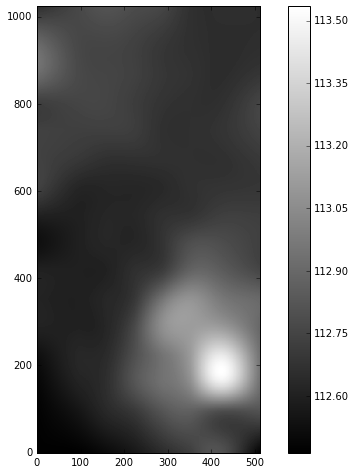

In [4]:
print 'Background'
bkg_image = bkg.back()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()

Background noise


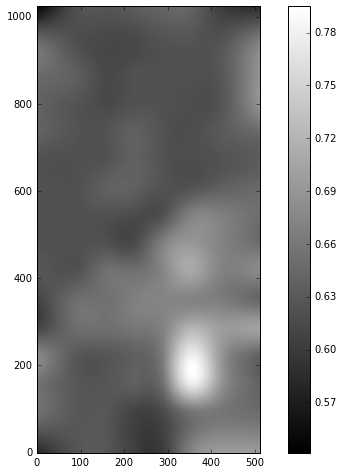

In [5]:
print 'Background noise'
bkg_rms = bkg.rms()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()

In [6]:
print 'Subtract the background'
data_sub = data - bkg

Subtract the background


Object detection and plot
Number of objects detected:  1046


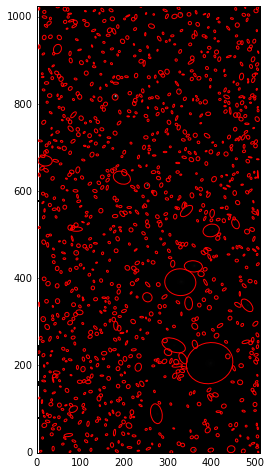

In [7]:
print 'Object detection and plot'
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
print 'Number of objects detected: ',len(objects)

from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [8]:
print 'Aperture Photometry'
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

for i in range(len(objects)):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

Aperture Photometry
object 0: flux = nan +/- 3.063365
object 1: flux = 15.050590 +/- 5.076055
object 2: flux = 31.385602 +/- 6.404954
object 3: flux = 19.558721 +/- 5.549556
object 4: flux = 26.356557 +/- 6.130217
object 5: flux = 16.057726 +/- 5.218541
object 6: flux = 255.602114 +/- 16.335268
object 7: flux = 25.010533 +/- 6.015478
object 8: flux = 273.382337 +/- 16.870250
object 9: flux = 19.500813 +/- 5.537184
object 10: flux = 24.390951 +/- 5.963757
object 11: flux = 22.366405 +/- 5.794269
object 12: flux = 29.581078 +/- 6.382842
object 13: flux = 26.423852 +/- 6.134411
object 14: flux = 20.982203 +/- 5.669374
object 15: flux = 776.641563 +/- 28.069490
object 16: flux = 67.585164 +/- 8.872038
object 17: flux = 14.799232 +/- 5.096536
object 18: flux = 19.022674 +/- 5.499607
object 19: flux = 25.620536 +/- 6.071193
object 20: flux = nan +/- 3.350075
object 21: flux = 130.393886 +/- 11.898291
object 22: flux = 23548.958651 +/- 153.493108
object 23: flux = 22.530735 +/- 5.809796
objec

In [10]:
print 'FLUX_RADIUS'
r, flag = sep.flux_radius(data, objects['x'], objects['y'], 6.*objects['a'], 0.5,
                          normflux=flux, subpix=5)
print r,flag

r, flag = sep.flux_radius(data, objects['x'], objects['y'], 6.*objects['a'],
                          [0.5, 0.6], normflux=flux, subpix=5)
print r,flag

FLUX_RADIUS
[        nan  0.13428796  0.1923736  ...,  0.37732878  0.14603791
  0.12980335] [16 16 16 ..., 16 16 16]
[[        nan         nan]
 [ 0.13428796  0.16114555]
 [ 0.1923736   0.21098216]
 ..., 
 [ 0.37732878  0.39725525]
 [ 0.14603791  0.15414158]
 [ 0.12980335  0.13741292]] [16 16 16 ..., 16 16 16]


In [11]:
for i in range(len(objects)):
    print 'object: ', i,',', 'thresh: ', objects['thresh'][i],',', 'x: ', objects['x'][i],',', 'y : ', objects['y'][i] 

object:  0 , thresh:  0.944276332855 , x:  507.621679735 , y :  1.18973113162
object:  1 , thresh:  0.944276332855 , x:  75.9623454817 , y :  1.9859575873
object:  2 , thresh:  0.944276332855 , x:  308.318068178 , y :  1.30376178722
object:  3 , thresh:  0.944276332855 , x:  8.71098223871 , y :  3.11505952346
object:  4 , thresh:  0.944276332855 , x:  183.227139111 , y :  3.45894972285
object:  5 , thresh:  0.944276332855 , x:  232.599814642 , y :  4.2073838207
object:  6 , thresh:  0.944276332855 , x:  473.48447015 , y :  3.25272783759
object:  7 , thresh:  0.944276332855 , x:  123.934002688 , y :  6.4203477991
object:  8 , thresh:  0.944276332855 , x:  398.881833256 , y :  5.8172984112
object:  9 , thresh:  0.944276332855 , x:  163.009776283 , y :  9.48224952841
object:  10 , thresh:  0.944276332855 , x:  96.8002440205 , y :  6.01039387144
object:  11 , thresh:  0.944276332855 , x:  255.728068077 , y :  8.97439133812
object:  12 , thresh:  0.944276332855 , x:  37.2166223134 , y :  9.

In [12]:
print 'Convert pixel coordinates to RA and DEC'
from astropy.wcs import WCS
w = WCS('Abell426.fits')
xlist = []
ylist = []
for i in range(0,len(objects['x'])):
    ra,dec = w.all_pix2world(30,40, i)
    xlist.append(ra)
    ylist.append(dec)

Convert pixel coordinates to RA and DEC


In [13]:
print len(xlist)
print len(ylist)

1046
1046


In [14]:
print 'Reading catalog from ds9(2MASS)'
from astropy.io.votable import parse_single_table
table = parse_single_table("catalogo_abell426.xml")
print table

Reading catalog from ds9(2MASS)
 _RAJ2000   _DEJ2000   RAJ2000    DEJ2000   ... Bflg Cflg Xflg Aflg
   deg        deg        deg        deg     ...                    
---------- ---------- ---------- ---------- ... ---- ---- ---- ----
 49.846077  41.491169  49.846077  41.491169 ...  111  000    2    0
 49.855790  41.484360  49.855790  41.484360 ...  111  000    2    0
 49.842343  41.493237  49.842343  41.493237 ...  111  000    2    0
 49.874863  41.483654  49.874863  41.483654 ...  111  000    0    0
 49.924776  41.499546  49.924776  41.499546 ...  111  000    0    0
 49.912190  41.485409  49.912190  41.485409 ...  111  000    0    0
 49.914257  41.494675  49.914257  41.494675 ...  111  000    0    0
 49.922114  41.455688  49.922114  41.455688 ...  111  000    0    0
 49.927692  41.462391  49.927692  41.462391 ...  111  000    0    0
 49.905286  41.485962  49.905286  41.485962 ...  111  000    0    0
       ...        ...        ...        ... ...  ...  ...  ...  ...
 50.084807  41.6

In [18]:
print 'Match'
from astropy.coordinates import SkyCoord
from astropy import units as u
cd = SkyCoord(ra=xlist*u.degree, dec=ylist*u.degree)  
ct = SkyCoord(ra=table.array['RAJ2000']*u.degree, dec=table.array['DEJ2000']*u.degree)
idxd, d2dd, d3d = cd.match_to_catalog_sky(ct)  
idxt, d2dt, d3d = ct.match_to_catalog_sky(cd)  
print len(idxd)
print len(idxt)

from astropy.coordinates import match_coordinates_sky
idxcd, idxct, d2d, d3d = ct.search_around_sky(cd, 5*u.arcsec)
print len(idxcd)
print len(idxct)
print len(np.unique(idxcd))
print len(np.unique(idxct))

Match
1046
638
1
1
1
1


Variable noise


1

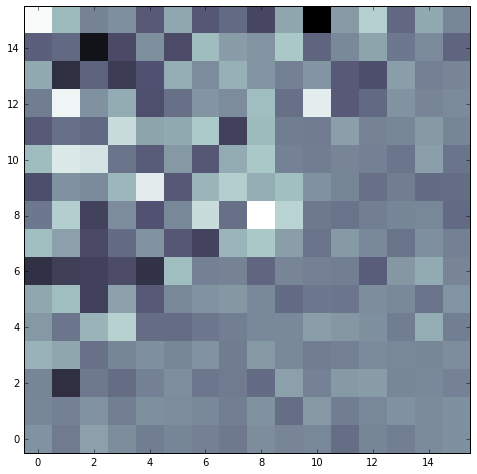

In [19]:
print 'Variable noise'
n = 16
X, Y = np.meshgrid(np.arange(n), np.arange(n))
mask = Y > X
error = np.ones((n, n))
error[mask] = 4.0
data = error * np.random.normal(size=(n, n))

source = 3.0 * np.array([[1., 2., 1.],
                         [2., 4., 2.],
                         [1., 2., 1.]])
m = n // 2 - 1
data[m:m+3, m:m+3] += source

plt.imshow(data, interpolation='nearest', origin='lower', cmap='bone')

objects = sep.extract(data, 3.0, err=error, filter_type='conv')
len(objects)

objects = sep.extract(data, 3.0, err=error, filter_type='matched')
len(objects)